# Анализ датасета `train.csv`

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

df = pd.read_csv("data/train.csv")
df.shape

(360336, 17)

## Обзор

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

In [3]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
id,360336.0,180167.500000,104020.187637,0.00,90083.75,180167.50,270251.25,360335.00
store_sales(in millions),360336.0,6.337376,3.307980,0.51,3.72,5.78,8.40,22.92
unit_sales(in millions),360336.0,3.043881,0.784676,1.00,3.00,3.00,4.00,6.00
total_children,360336.0,2.456482,1.488992,0.00,1.00,2.00,4.00,5.00
num_children_at_home,360336.0,0.689390,1.214732,0.00,0.00,0.00,1.00,5.00
avg_cars_at home(approx).1,360336.0,2.203813,1.084293,0.00,1.00,2.00,3.00,4.00
gross_weight,360336.0,13.822071,4.614792,6.00,9.71,13.60,17.70,21.90
recyclable_package,360336.0,0.568086,0.495343,0.00,0.00,1.00,1.00,1.00
low_fat,360336.0,0.327797,0.469411,0.00,0.00,0.00,1.00,1.00
units_per_case,360336.0,18.972706,10.212912,1.00,10.00,20.00,28.00,36.00


## Пропуски, дубликаты, уникальные значения

In [4]:
df.isna().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

In [5]:
df.duplicated().sum()


np.int64(0)

In [6]:
df.nunique()

id                            360336
store_sales(in millions)        1044
unit_sales(in millions)            6
total_children                     6
num_children_at_home               6
avg_cars_at home(approx).1         5
gross_weight                     384
recyclable_package                 2
low_fat                            2
units_per_case                    36
store_sqft                        20
coffee_bar                         2
video_store                        2
salad_bar                          2
prepared_food                      2
florist                            2
cost                             328
dtype: int64

Пропусков и дубликатов нет. recyclable_package, low_fat, coffee_bar, video_store, salad_bar, prepared_food, florist - бинарные.
total_children, num_children_at_home и avg_cars_at home(approx).1 - похожи на дискретные

## Визуализация: распределения признаков

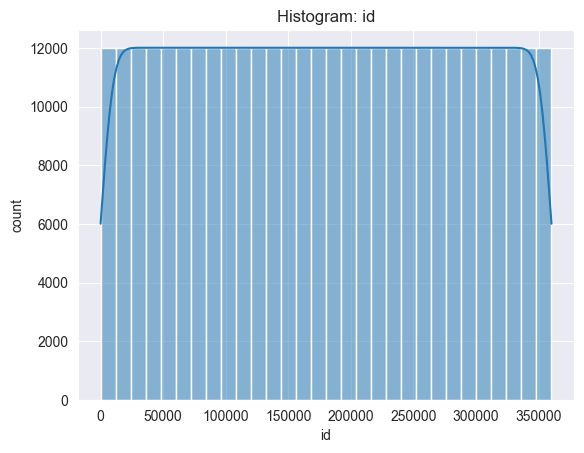

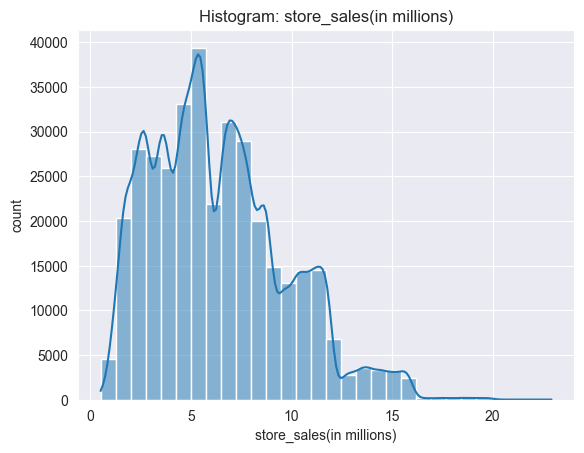

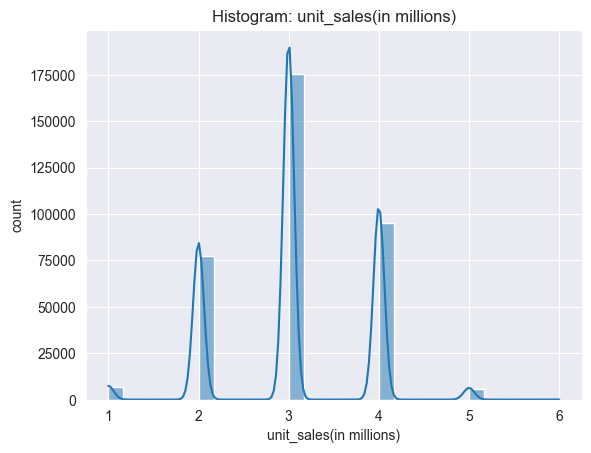

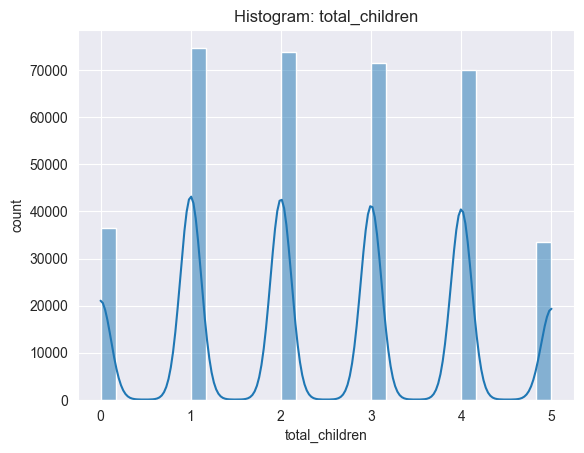

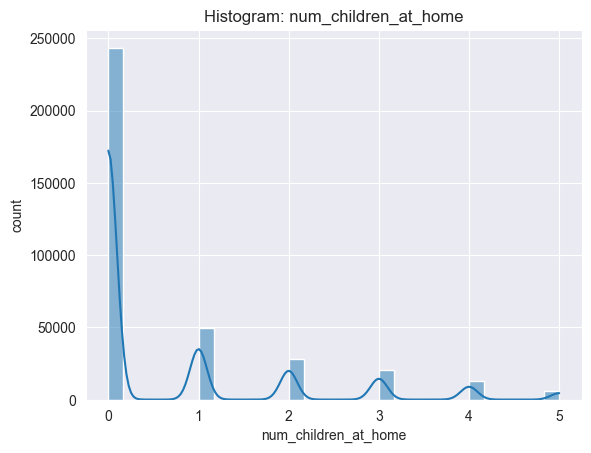

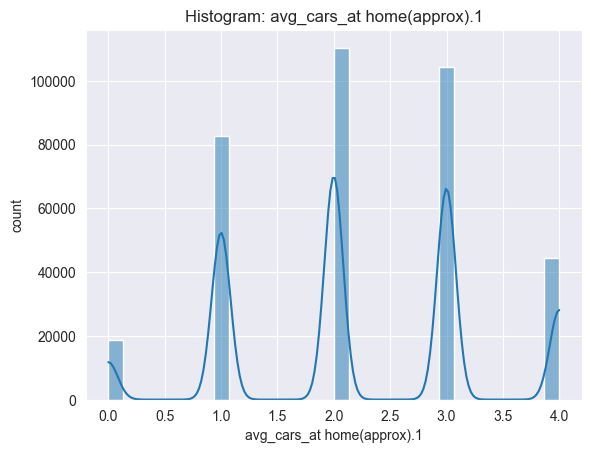

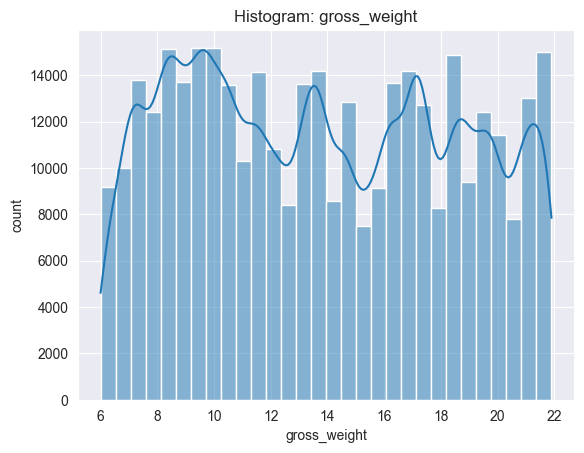

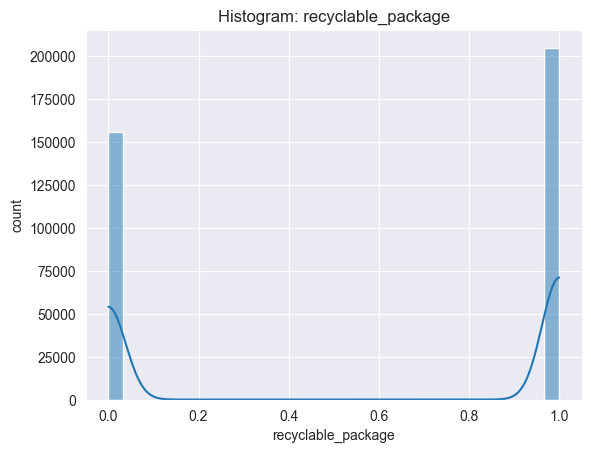

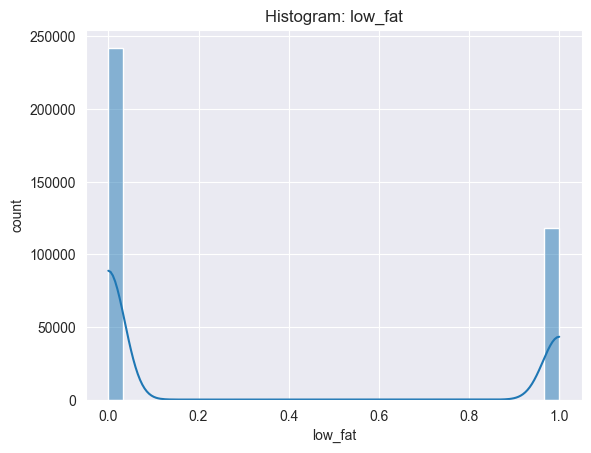

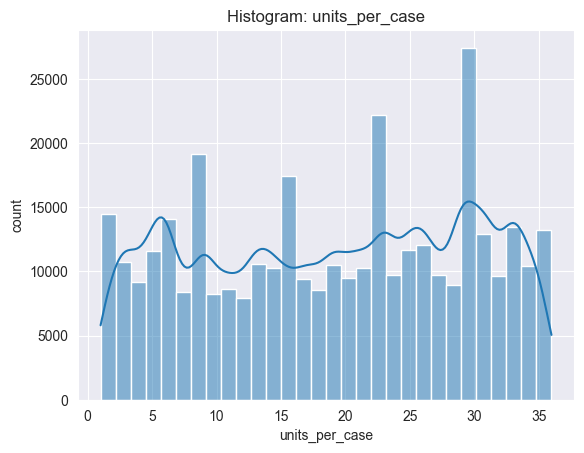

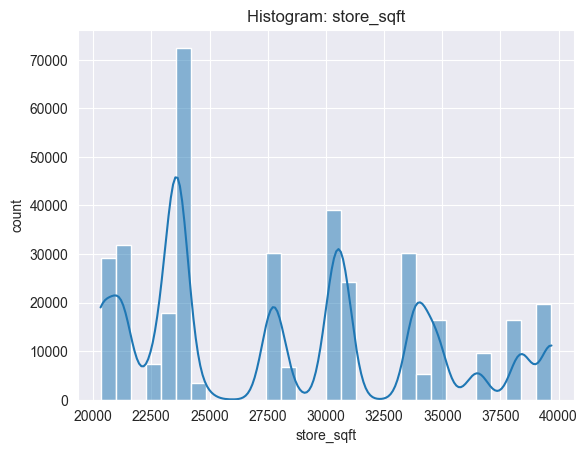

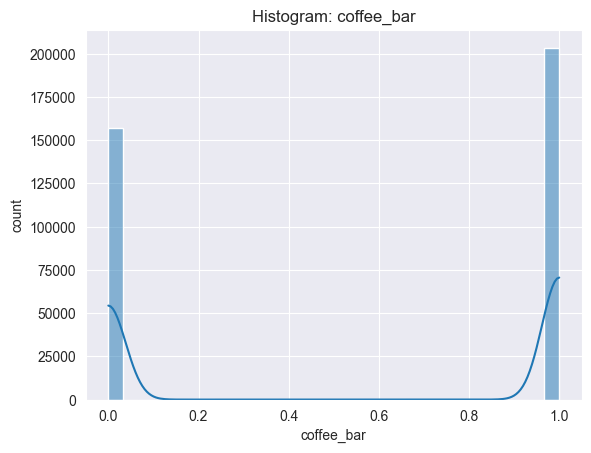

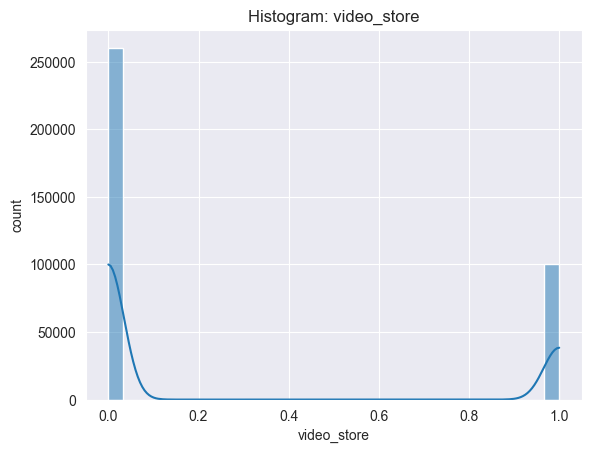

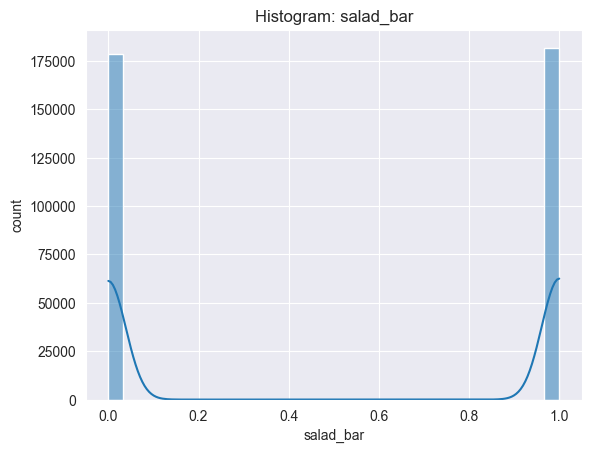

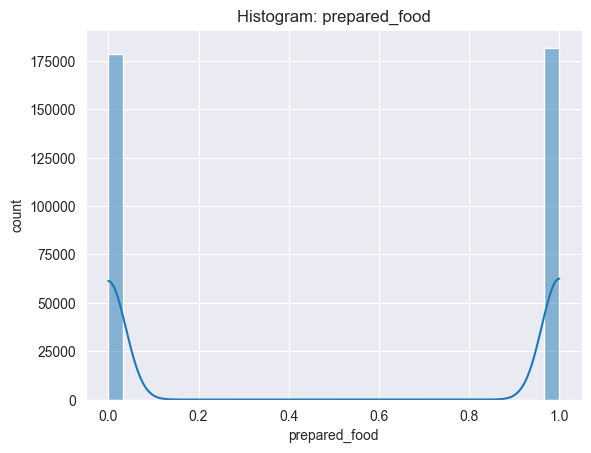

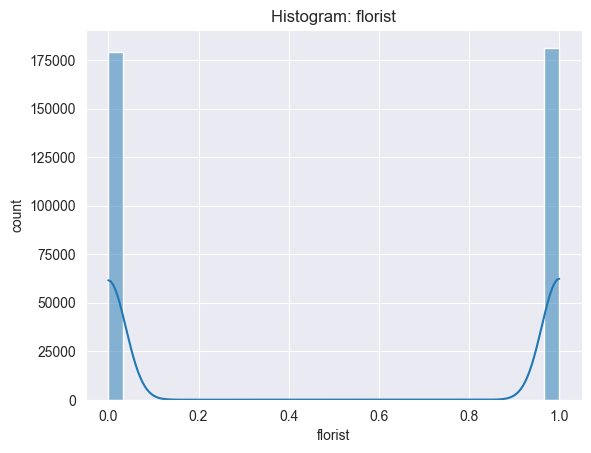

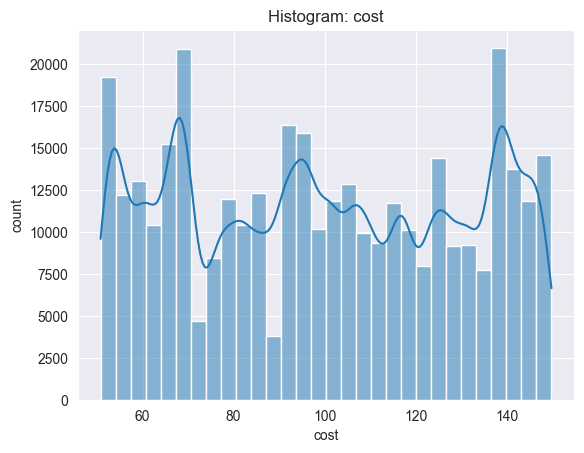

In [7]:
for c in df.columns:
    plt.figure()
    sns.histplot(df[c], bins=30, kde=True)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c)
    plt.ylabel("count")
    plt.show()

## Корреляции

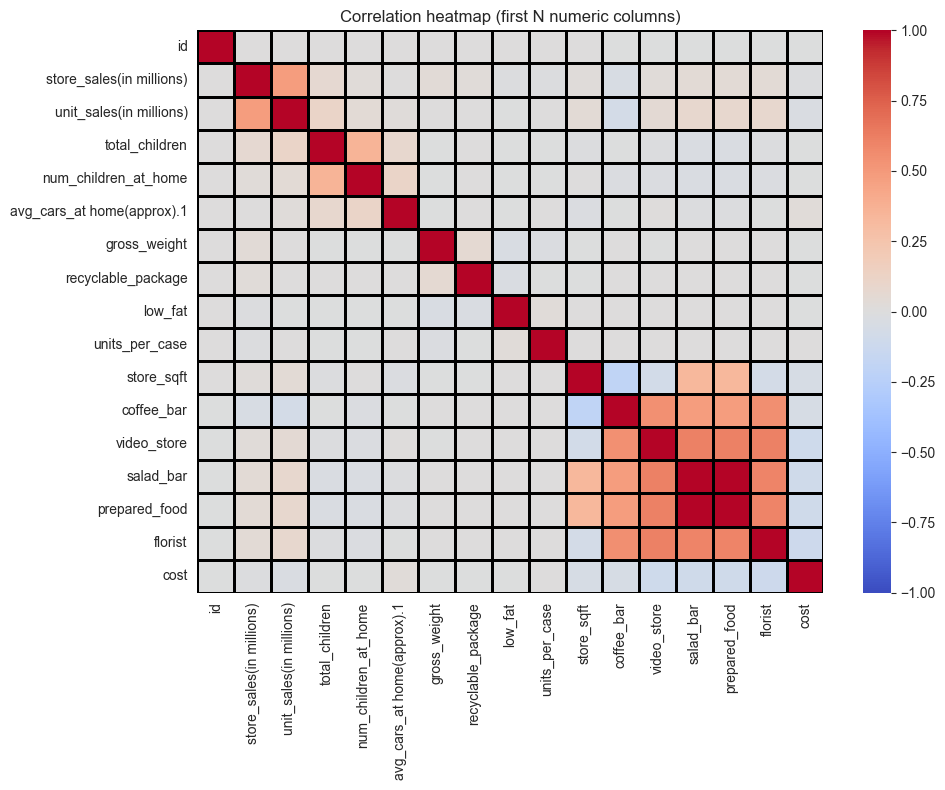

In [12]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
plt.title("Correlation heatmap (first N numeric columns)")
plt.tight_layout()
plt.show()

In [10]:
df[["prepared_food", "salad_bar"]].value_counts()


prepared_food  salad_bar
1.0            1.0          181890
0.0            0.0          178417
1.0            0.0              19
0.0            1.0              10
Name: count, dtype: int64

prepared_food и salad_bar можно считать зависимыми

## Pairplot

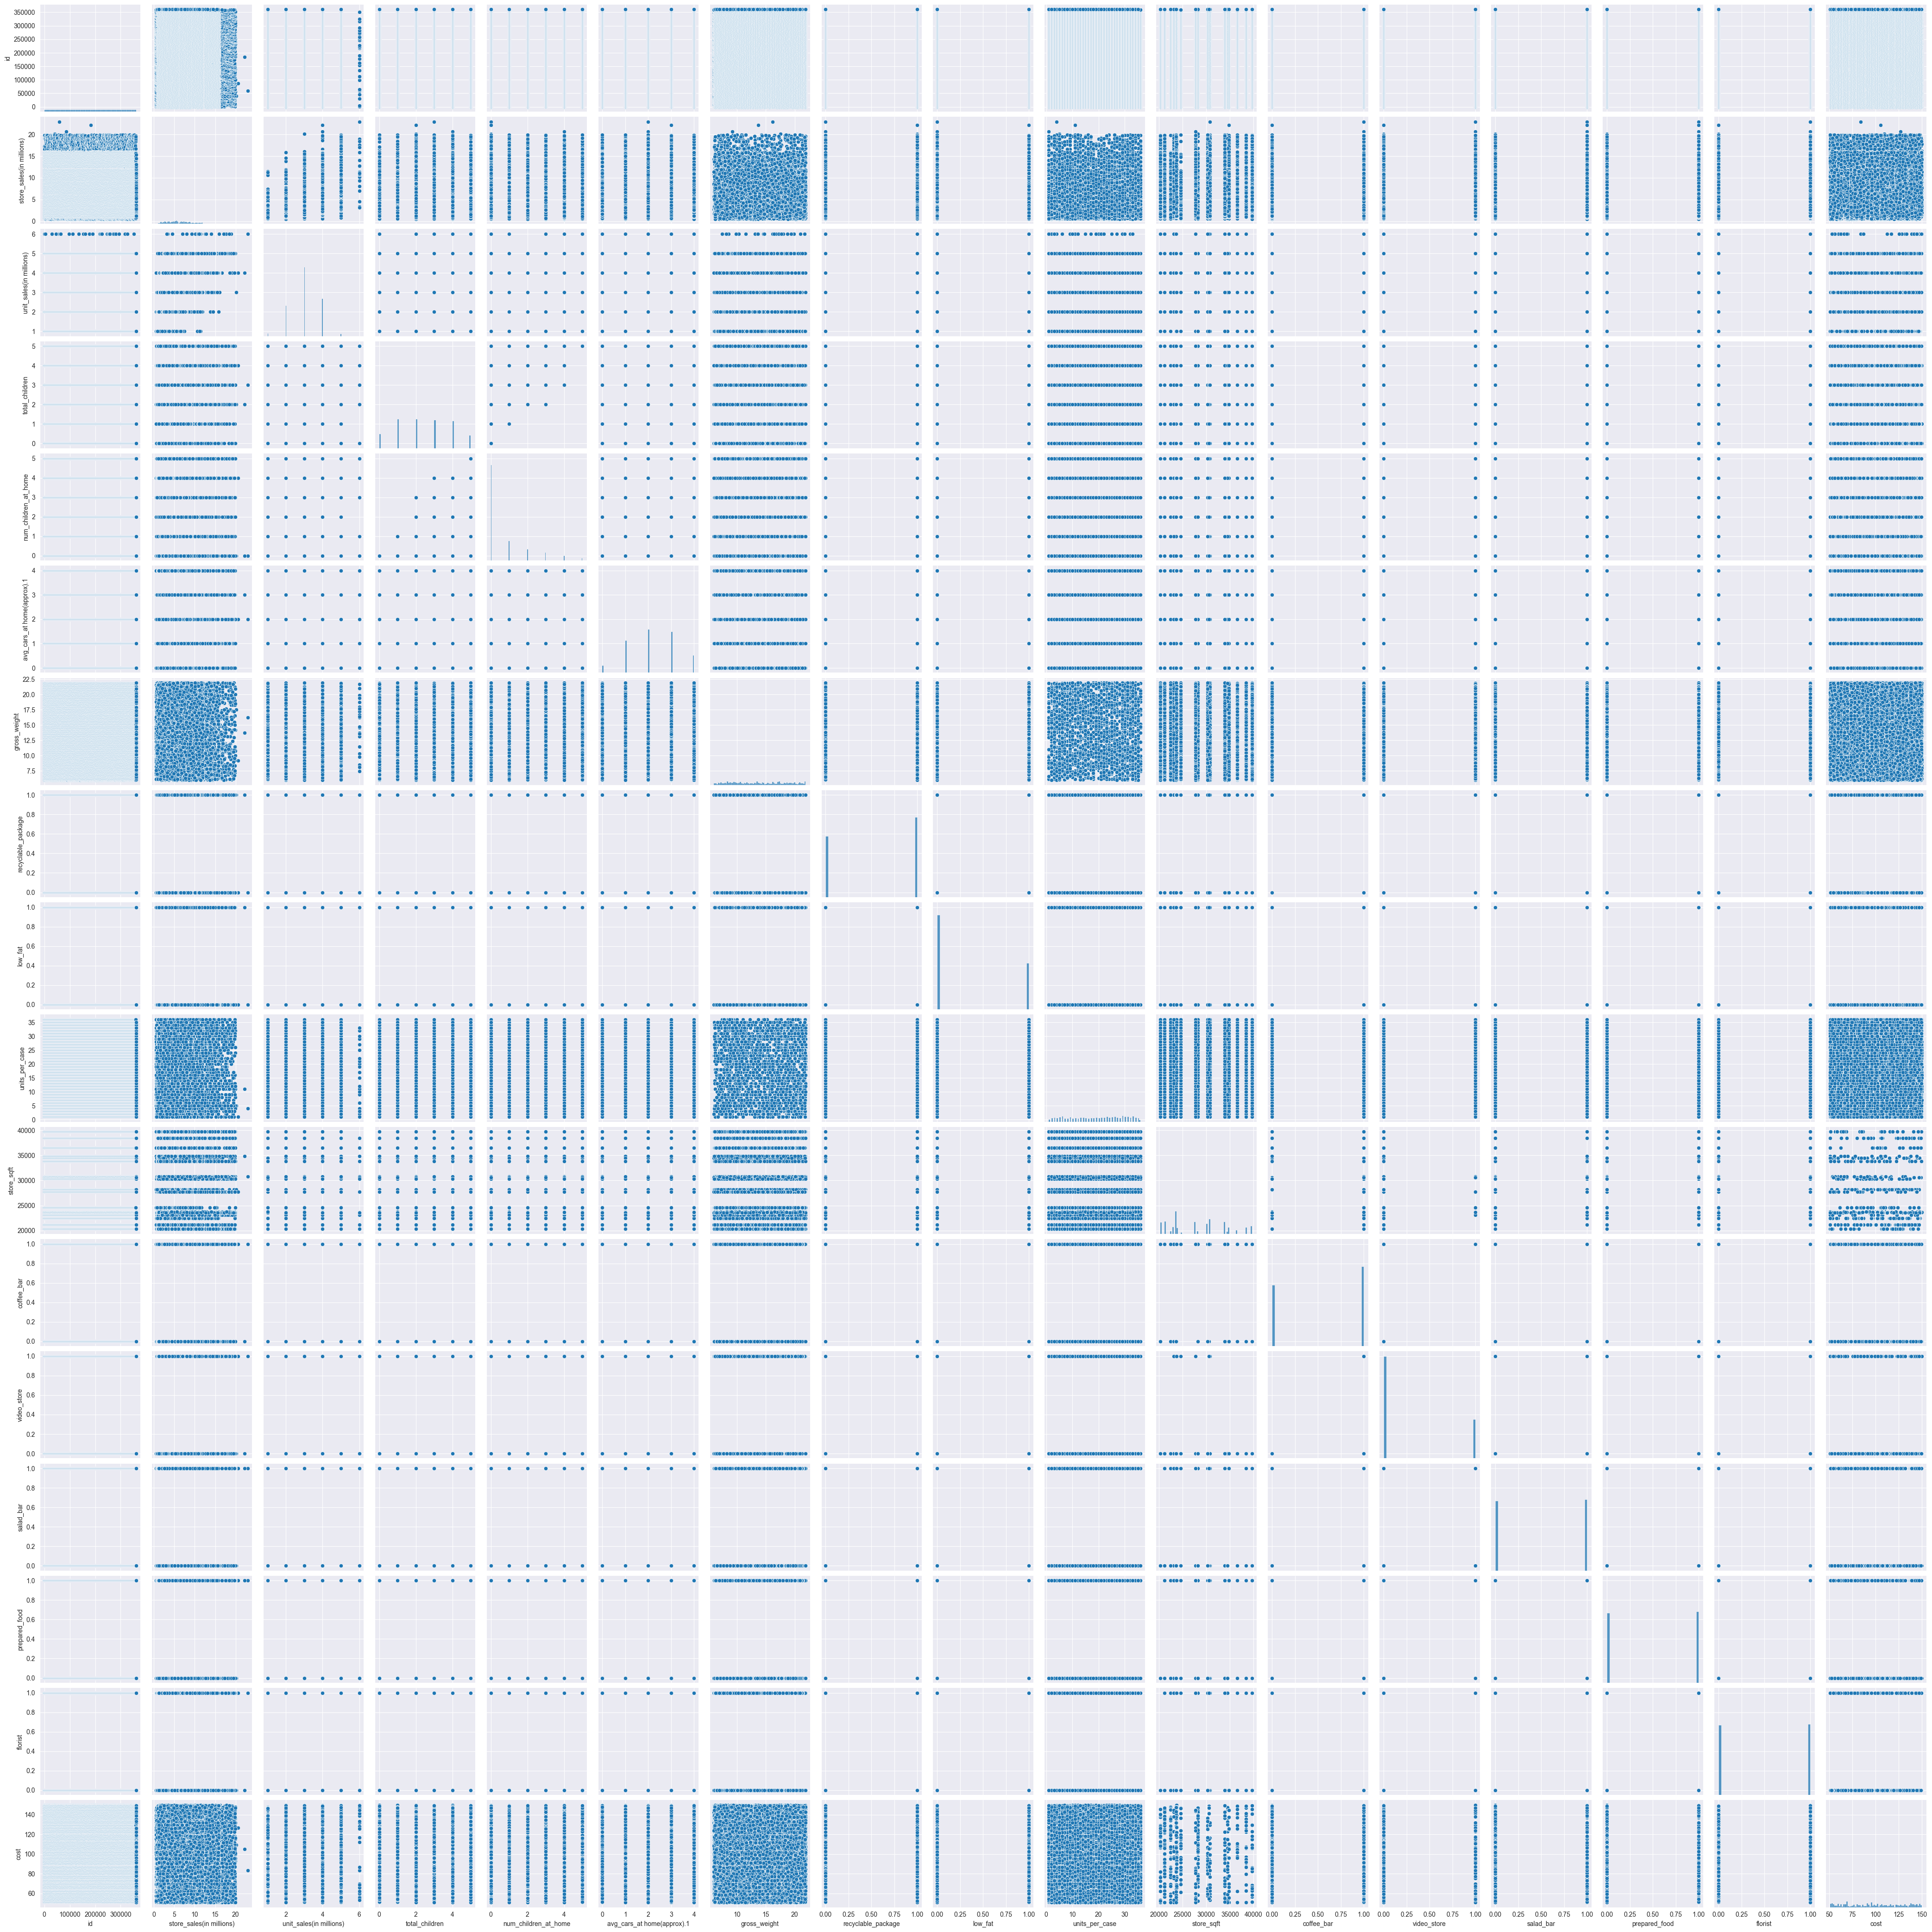

In [9]:
sns.pairplot(df)